In [71]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from datetime import date, datetime
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
get_ipython().run_line_magic('matplotlib', 'inline')

In [72]:
def reader_csv(file):
       
    csv_file = pd.read_csv(file)
    return csv_file


def print_dim(names, df):
        
    print("The dataset {} has {} rows and {} columns".format(names, df.shape[0], df.shape[1]))


def drop_duplicates_items(df):
    
    print("The number of duplicates is {}".format(df.duplicated().sum()))
    df = df.drop_duplicates(inplace=True)
    return df


def get_data_info(df):
       
    print("Data Information:\n {}".format(df.info()))

    
def data_nan_count(df):
    
    print("Amount of Nan per columns:\n {}".format(pd.isnull(df).sum()))

def data_description(df):
    
    print("Descriptive Statistics:\n {}".format(df.describe()))
    

def host_to_year(df, col, col_new):
    
    df['tmp'] = datetime.now() - df[col]
    df[col_new] = df['tmp'].apply(lambda x : x.days / 365)
    df = df.drop(['tmp', col], axis=1)
    return df


def replace_chars(input_string, chars, modified_string):
        
    for char in chars:
        try :
            if char in input_string:
                input_string = input_string.replace(char, modified_string)
        except:
            continue       
    return input_string


def plots_comparison(group1, group2, feature):
        
    plt.tight_layout()
    plt.subplot(1,2,1)
    plt.xticks(rotation='vertical')
    sns.countplot(group1[feature])
    plt.subplot(1,2,2)
    sns.countplot(group2[feature])
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

def category_impute(strategy, df, features_to_impute):
   
    imputer = SimpleImputer(strategy=strategy)
    df_imp = imputer.fit_transform(df[features_to_impute])
    imputed_features = pd.DataFrame(data=df_imp, columns=features_to_impute)
    df = pd.concat([df.drop(features_to_impute, axis=1), imputed_features], axis=1)
    return df

In [73]:
listings_data = reader_csv('listings.csv')

In [74]:
drop_duplicates_items(listings_data)
print()
get_data_info(listings_data)
print()
data_nan_count(listings_data)
print()
data_description(listings_data)
print()

The number of duplicates is 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_pictur

In [75]:
features_list = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'minimum_nights',
            'price', 'host_since', 'host_response_rate', 'host_response_time',
            'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',                        
            'has_availability', 'number_of_reviews', 'review_scores_rating', 
            'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification',
            'host_identity_verified', 'neighbourhood', 'property_type', 'room_type']

vars_bin = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability'
            'require_guest_profile_picture', 'require_guest_phone_verification']
var_target = 'price'
vars_num = ['host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms',
            'beds', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'host_in_years']
vars_cat = ['host_response_time', 'neighbourhood', 'property_type', 'room_type', 'bed_type',
            'cancellation_policy', ]

df = listings_data[features_list]

In [76]:
df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
df = host_to_year(df, 'host_since', 'host_in_years')

df['price'] = df['price'].apply(lambda x : replace_chars(x, ['$', ','], '')).astype(float)

df['host_response_rate'] = df['host_response_rate'].apply(lambda x : replace_chars(x, '%', '')).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x : replace_chars(x, '%', '')).astype(float)

df['host_is_superhost'] = df['host_is_superhost'].map({'t':1, 'f':0})

df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t':1, 'f':0})

df['host_identity_verified'] = df['host_identity_verified'].map({'t':1, 'f':0})

df['has_availability'] = df['has_availability'].map({'t':1, 'f':0})

df['require_guest_profile_picture'] = df['require_guest_profile_picture'].map({'t':1, 'f':0})

df['require_guest_phone_verification'] = df['require_guest_phone_verification'].map({'t':1, 'f':0})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [77]:
pd.isnull(df).sum()

accommodates                          0
bathrooms                            16
bedrooms                              6
beds                                  1
bed_type                              0
minimum_nights                        0
price                                 0
host_response_rate                  523
host_response_time                  523
host_acceptance_rate                773
host_is_superhost                     2
host_has_profile_pic                  2
has_availability                      0
number_of_reviews                     0
review_scores_rating                647
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
host_identity_verified                2
neighbourhood                       416
property_type                         1
room_type                             0
host_in_years                         2
dtype: int64

<BarContainer object of 23 artists>

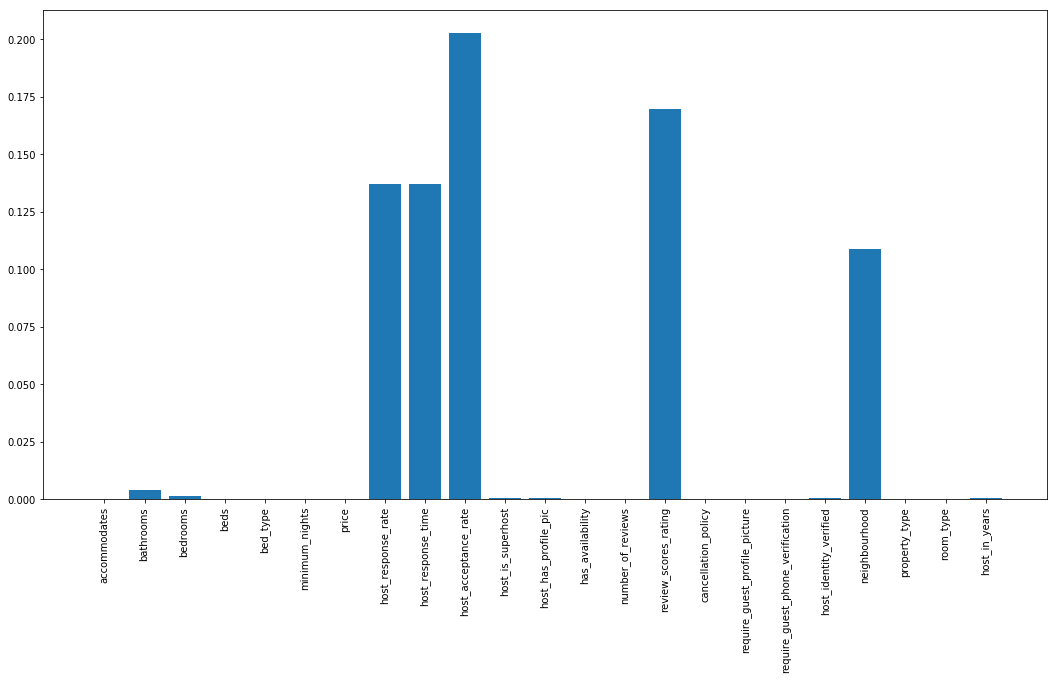

In [78]:
d = pd.isnull(df).sum()
d = {'features' : d.index, 'missing_values': d, 'proportion_missing_values': (d/df.shape[0])}
d = pd.DataFrame(data=d).reset_index(drop=True)
plt.figure(figsize=(18,9))
plt.xticks(rotation="vertical")
plt.bar(d.features, d.proportion_missing_values)

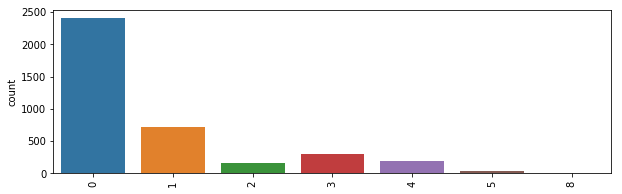

In [79]:
missing_rows = pd.isnull(df).sum(axis=1)
plt.figure(figsize=(10,3))
plt.xticks(rotation="vertical")
sns.countplot(missing_rows)

Index(['accommodates', 'bed_type', 'minimum_nights', 'price',
       'has_availability', 'number_of_reviews', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'room_type'],
      dtype='object')


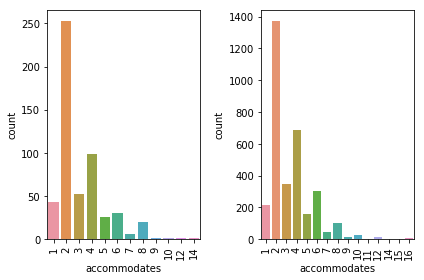

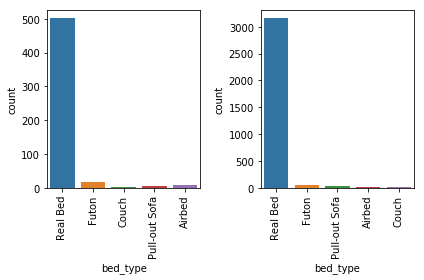

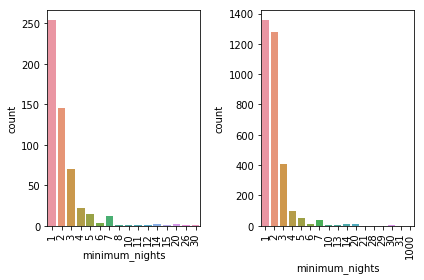

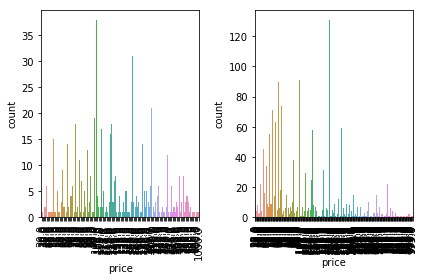

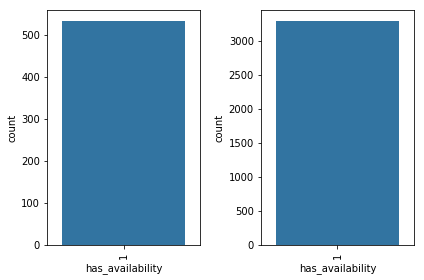

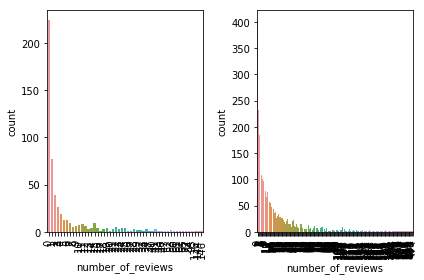

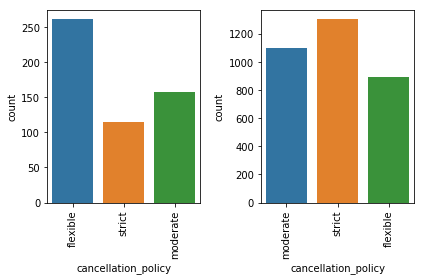

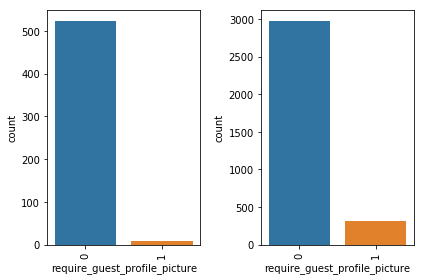

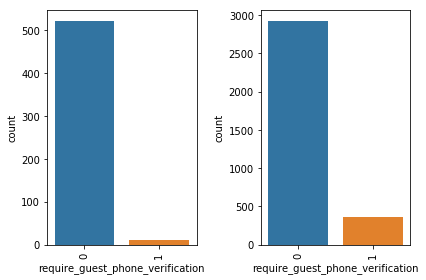

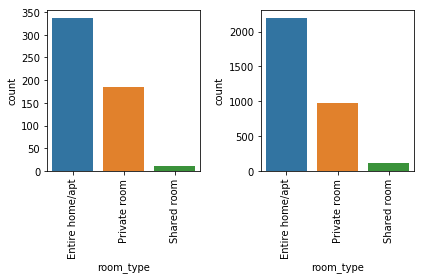

In [80]:
cutoff = 2
above_cutoff = df[pd.isnull(df).sum(axis=1) > cutoff]
below_cutoff = df[pd.isnull(df).sum(axis=1) <= cutoff]

col_no_Nan = df.loc[:, pd.isnull(df).sum(axis=0) == 0].columns
print(col_no_Nan)

for i in col_no_Nan: 
    plots_comparison(above_cutoff, below_cutoff, i)

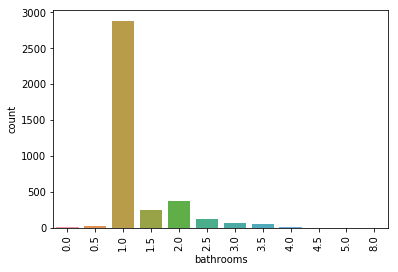

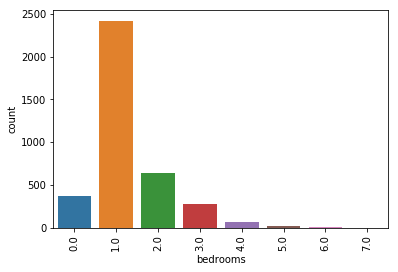

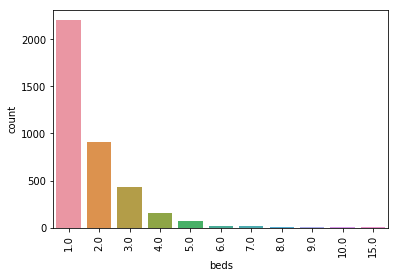

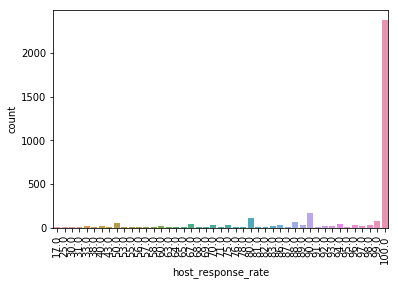

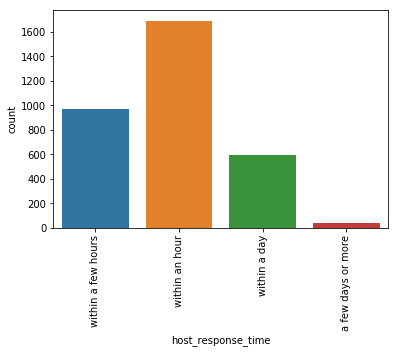

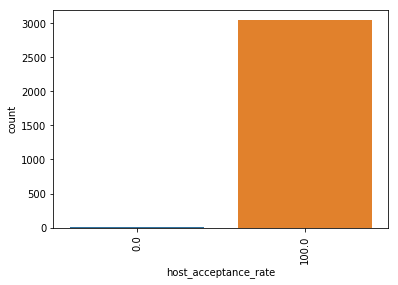

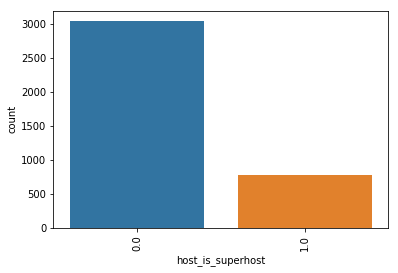

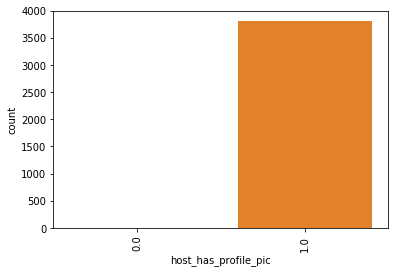

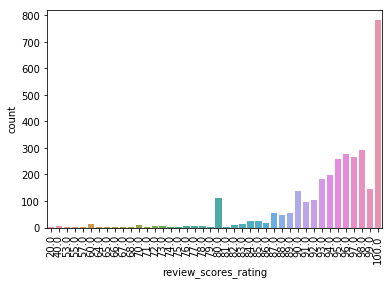

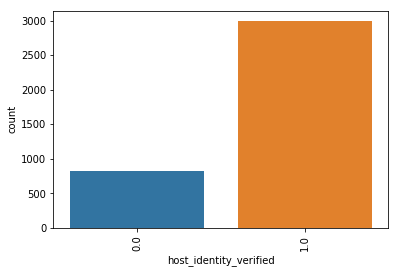

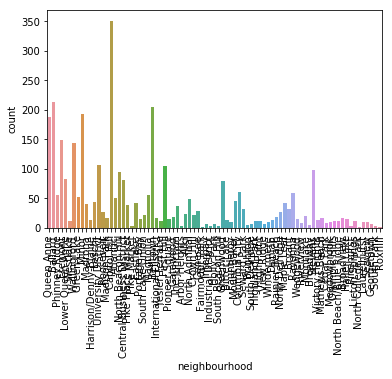

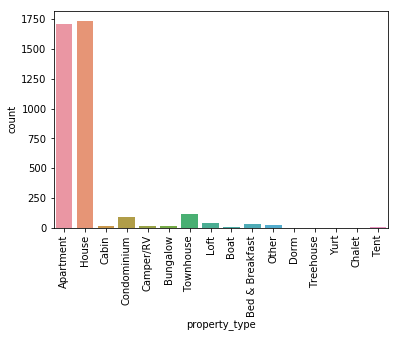

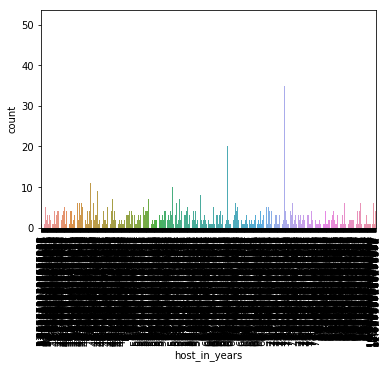

In [81]:
with_missing_item = df.columns[pd.isnull(df).sum() > 0]
for i in range(len(with_missing_item)):
    sns.countplot(df[with_missing_item[i]])
    plt.xticks(rotation="vertical")
    plt.show()

In [82]:
feat_to_impute = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                 'neighbourhood', 'property_type', 'bathrooms', 'bedrooms', 'beds']
df = category_impute('most_frequent', df, feat_to_impute)
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())
df['host_in_years'] = df['host_in_years'].fillna(df['host_in_years'].median())

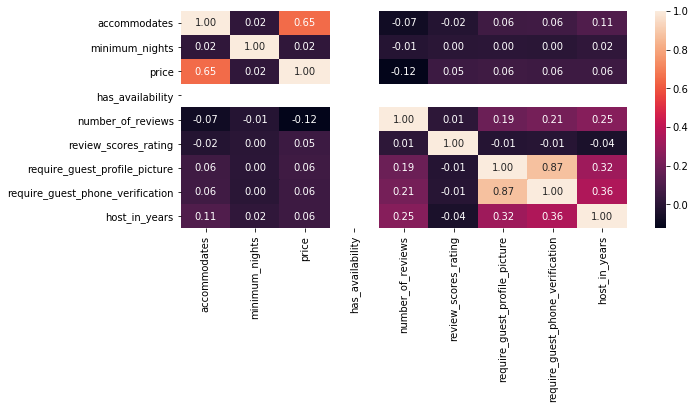

In [83]:
plt.figure(figsize=(10,4))
m = df.corr()
sns.heatmap(m, annot=True, fmt=".2f")

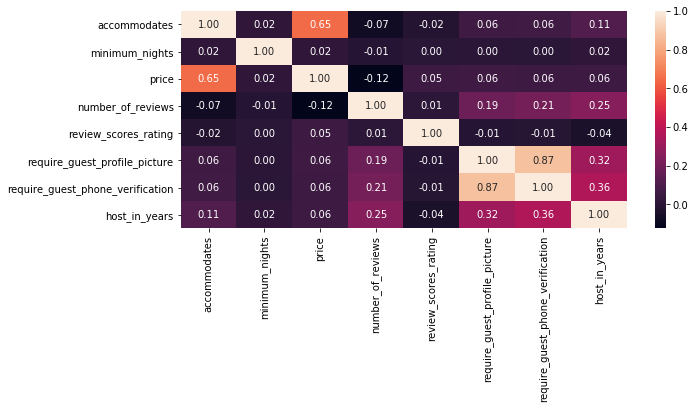

In [84]:
df = df.drop('has_availability', axis=1)
plt.figure(figsize=(10,4))
m = df.corr()
sns.heatmap(m, annot=True, fmt=".2f")

In [85]:
housing_types = ['Apartment', 'House', 'Townhouse', 'Condominium', 'Loft']
df_sub = df[df['property_type'].apply(lambda x : x in housing_types)]
df_sub = df_sub[df_sub['bed_type'] == 'Real Bed']
df_sub['price_per_bed'] = df_sub['price'] / df_sub['beds']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

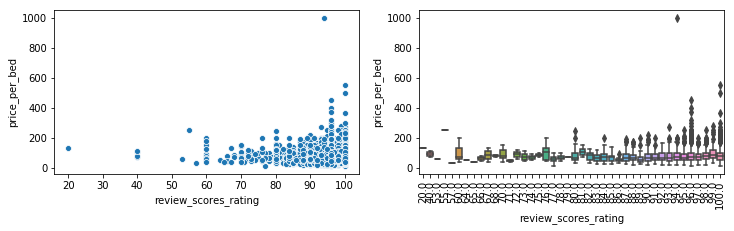

In [86]:
df_sub["price_per_bed"] = df_sub['price_per_bed'].astype(float)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(df_sub['review_scores_rating'], df_sub['price_per_bed'])
plt.subplot(1,2,2)
sns.boxplot(df_sub['review_scores_rating'], df_sub['price_per_bed'])
plt.xticks(rotation='vertical')